# Lead Score Case Study - Hardikkumar Babulal Panchal & Ankita Patel

### Need to build a Logistic Regression Model to assign Lead Score between 0 and 100 to each leads.

 - X Education gets a lots of leads through several websites and search engines.
 - Their Lead Conversion rate is very low.
 - Goal is to build a Logistic Regression Model which assign a Lead Score to each received leads
 - So Company can reach out to this high Lead score people/leads to provide them possible help and convince them to buy their course
 - And company's conversion rate can be increased.
 - Company's CEO has given target of conversion rate 80%

### Let's Start with Reading the data

In [1]:
# Importing all required liberaries first to work with Data.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# we will use Sklearn and statsmodel both libraries in this model so importing all modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [2]:
# Importing provided Leads data 'Leads.csv'
Lead1 = pd.read_csv('Leads.csv')
Lead1.head()                           # Checking data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking info to understand data columns and other details.
Lead1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# Checking shape to ounderstand how many columns and rows present in data
Lead1.shape

(9240, 37)

In [5]:
# Understanding of numerical columns
Lead1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Checking for possible issues in data

In [6]:
# Checking null values in all columns percentage wise
((Lead1.isnull().sum()/len(Lead1))*100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [7]:
# dropping columns where missing values are more than 45%
Lead1 = Lead1.loc[:,Lead1.isnull().mean()<=0.45]
Lead1.shape                       # checking shape of dataframe after removing these columns

(9240, 32)

#### Now will impute missing values in columns with less than 45% null.

In [8]:
# Starting with 'Tags' columns with checking its available values
Lead1.Tags.value_counts(normalize = True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

In [9]:
# We can see that, it is categorical column & 36.28% nulls, so creating another category in it with 'Missing_tag'
Lead1.Tags.fillna('Missing_tag',inplace=True)
Lead1.Tags.value_counts(normalize=True)

Missing_tag                                          0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

In [10]:
# Checking 'City' columns now.
Lead1.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [11]:
# We see that we have 15.36% missing values and around 2249 rows are with 'Select' value
# 'Select' is nothing but a missing value which provides no information and equal to Null only
# So imputing missing values with new city category 'Missing_City' and replacing all 'Select' with this new category

Lead1.City.fillna('Missing_city',inplace=True)
Lead1.City.replace('Select', 'Missing_city', inplace =True)
Lead1.City.value_counts(normalize=True)

Missing_city                   0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [12]:
# Now checking 'Country' column for missing data
Lead1.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [13]:
# We can see that column has more than 95% values are same and rest values are in very low numbers.
# This column can not be useful in analysis so need to drop it.

Lead1 = Lead1.drop('Country', axis=1)

In [14]:
# Checking 'Lead Profile' column
Lead1['Lead Profile'].value_counts(normalize = True)

Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: Lead Profile, dtype: float64

In [15]:
# We see that we have 29.31% missing values and 63.48% rows are with 'Select' value
# 'Select' is nothing but a missing value which provides no information and equal to Null only
# So imputing missing values with new city category 'Missing_LeadPro' and replacing all 'Select' with this new category

Lead1['Lead Profile'].fillna('Missing_LeadPro',inplace=True)
Lead1['Lead Profile'].replace('Select', 'Missing_LeadPro', inplace =True)
Lead1['Lead Profile'].value_counts(normalize=True)

Missing_LeadPro                0.741883
Potential Lead                 0.174567
Other Leads                    0.052706
Student of SomeSchool          0.026082
Lateral Student                0.002597
Dual Specialization Student    0.002165
Name: Lead Profile, dtype: float64

In [16]:
# Checking 'What matters most to you in choosing a course' column now.
Lead1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [17]:
# We can see that column has 6528 values are same and rest values are in very low numbers.
# This column can not be useful in analysis so need to drop it.

Lead1 = Lead1.drop('What matters most to you in choosing a course', axis=1)

In [18]:
# Checking 'What is your current occupation' column
Lead1['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
# For this column we can impute Nulls with new category 'Missing_CurOccu' 
Lead1['What is your current occupation'].fillna('Missing_CurOccu',inplace=True)
Lead1['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.606061
Missing_CurOccu         0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [20]:
# Checking 'How did you hear about X Education' column now
Lead1['How did you hear about X Education'].value_counts(normalize = True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: How did you hear about X Education, dtype: float64

In [21]:
# it has majority columns "Select" values which has no significance and 2nd majority are missing. 
# droping this column as, in analysis it will not be useful

Lead1 = Lead1.drop('How did you hear about X Education', axis=1)

In [22]:
# Checking 'Specialization' column now
Lead1['Specialization'].value_counts(normalize = True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Travel and Tourism                   0.026019
Media and Advertising                0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

In [23]:
# We can impute Nulls with new category 'Missing_Speci' and replacing 'Select' also with this new category
Lead1['Specialization'].fillna('Missing_Speci',inplace=True)
Lead1['Specialization'].replace('Select', 'Missing_Speci', inplace =True)
Lead1['Specialization'].value_counts(normalize=True)

Missing_Speci                        0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [24]:
# Checking 'Last Activity' column now
Lead1['Last Activity'].value_counts(normalize = True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [25]:
# filling Nulls values with new category 'Missing_LasAct'
Lead1['Last Activity'].fillna('Missing_LasAct',inplace=True)
Lead1['Last Activity'].value_counts(normalize = True)

Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
Missing_LasAct                  0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64

In [26]:
# Checking 'Lead Source' column now
Lead1['Lead Source'].value_counts(normalize = True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [27]:
# filling Nulls values with new category 'Missing_LeadSource'
Lead1['Lead Source'].fillna('Missing_LeadSource',inplace=True)
Lead1['Lead Source'].value_counts(normalize = True)

Google                0.310390
Direct Traffic        0.275216
Olark Chat            0.189935
Organic Search        0.124892
Reference             0.057792
Welingak Website      0.015368
Referral Sites        0.013528
Facebook              0.005952
Missing_LeadSource    0.003896
bing                  0.000649
google                0.000541
Click2call            0.000433
Press_Release         0.000216
Social Media          0.000216
Live Chat             0.000216
youtubechannel        0.000108
testone               0.000108
Pay per Click Ads     0.000108
welearnblog_Home      0.000108
WeLearn               0.000108
blog                  0.000108
NC_EDM                0.000108
Name: Lead Source, dtype: float64

In [28]:
# checking missing values again.
((Lead1.isnull().sum()/len(Lead1))*100).sort_values(ascending=False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Prospect ID                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
City                                        0.000000
Lead Profile                                0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Tags                                        0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
Lead Number                                 0.000000
Search                                      0.

In [29]:
# Earlier we saw that 'Page Views Per Visit' & 'TotalVisits' are numerical columns
# Let's understand these two columns
Lead1['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [30]:
# Checking 'TotalVisits'
Lead1['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### To understand better these 2 numerical columns lets see boxplots for this.

<AxesSubplot:xlabel='TotalVisits'>

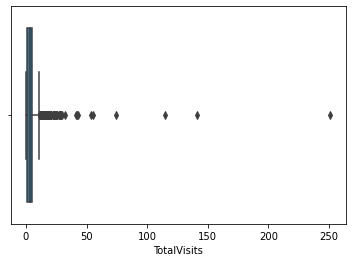

In [31]:
# Checking boxplot for 'TotalVisits'
sns.boxplot(Lead1['TotalVisits'])

<AxesSubplot:xlabel='Page Views Per Visit'>

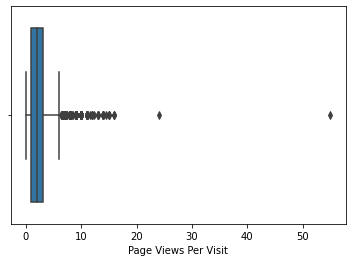

In [32]:
# Checking boxplot for 'Page Views Per Visit'
sns.boxplot(Lead1['Page Views Per Visit'])

In [33]:
# We have very less 1.48% missing values in both columns. Both have outliers too.
# First lets fill the missing values for these 2 columns with median value

Lead1['TotalVisits'].replace(np.NaN, Lead1['TotalVisits'].median(), inplace =True)
Lead1['Page Views Per Visit'].replace(np.NaN, Lead1['Page Views Per Visit'].median(), inplace =True)

### Outlier Treatment

<AxesSubplot:xlabel='TotalVisits'>

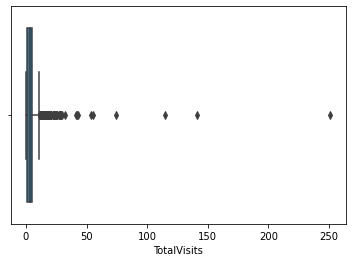

In [34]:
# Let's start with 'TotalVisits' column
sns.boxplot(Lead1['TotalVisits'])

#### We can see that clear outliers are present in this column. Lets check how much percentange values are fall in outlier catetgory

In [35]:
# Checking how much quantiles are in range and how much are outliers with very good margin.
# checking 99.5% values
Lead1['TotalVisits'].describe(percentiles=[.995])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
50%         3.000000
99.5%      20.805000
max       251.000000
Name: TotalVisits, dtype: float64

#### We can see that 99.5% values are considered to be range as till 20 it is still in ranges. But after that it is outliers.

<AxesSubplot:xlabel='TotalVisits'>

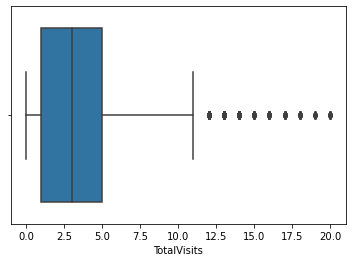

In [36]:
# removing top 0.05% values which are outliers from this column
Lead1 = Lead1[Lead1['TotalVisits'] <= Lead1['TotalVisits'].quantile(0.995)]
# Checking how this box plot looks like after removing these outliers.
sns.boxplot(Lead1['TotalVisits'])

#### we can see that all values of 'TotalVisits' are in acceptable range now.
#### Let's check another variable now.

<AxesSubplot:xlabel='Page Views Per Visit'>

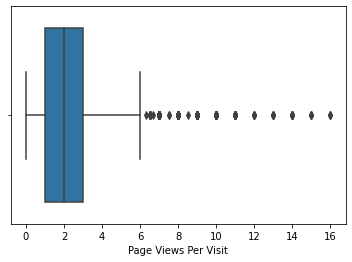

In [37]:
# Let's check for 'Page Views Per Visit'
sns.boxplot(Lead1['Page Views Per Visit'])

In [38]:
# Checking how much quantiles are in range and how much are outliers with very good margin.
# checking 99.5% values
Lead1['Page Views Per Visit'].describe(percentiles=[.995])

count    9193.000000
mean        2.337670
std         2.048149
min         0.000000
50%         2.000000
99.5%      10.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

#### We can see that mean is at 2.33 and we can considere approx around 10 is still acceptable range but after 10 values are outliers.

<AxesSubplot:xlabel='Page Views Per Visit'>

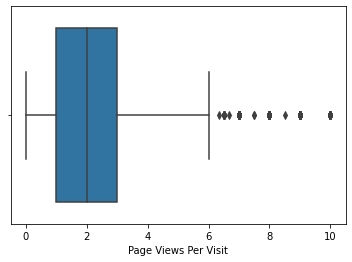

In [39]:
# removing top 0.05% values which are outliers from this column
Lead1 = Lead1[Lead1['Page Views Per Visit'] <= Lead1['Page Views Per Visit'].quantile(0.995)]
# Let's check box plot again to see how it looks after outlier removal
sns.boxplot(Lead1['Page Views Per Visit'])

<AxesSubplot:xlabel='Total Time Spent on Website'>

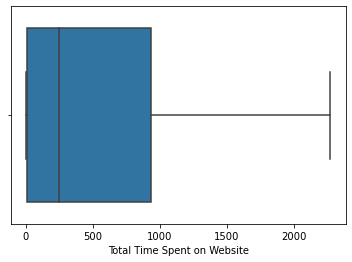

In [40]:
# Now checking another numerical column 'Total Time Spent on Website' for outliers.
sns.boxplot(Lead1['Total Time Spent on Website'])

#### There are no outliers in this 'Total Time Spent on Website' column. All values are in acceptable range.

In [41]:
# checking missing values again.
((Lead1.isnull().sum()/len(Lead1))*100).sort_values(ascending=False)

Prospect ID                                 0.0
Newspaper Article                           0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Lead Profile                                0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Magazine                                    0.0
Lead Number                                 0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                    

#### we can see that there are no columns with missing values now.
#### we treated Outliers also from numerical columns.
#### Now let's check other discrepancies/issues in data in columns

In [42]:
# Printing all unique values in each column to understand what is present in each column
col = Lead1.columns.tolist()
for i in col:
    print(i, '==>', Lead1[i].unique())
    print()

Prospect ID ==> ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']

Lead Number ==> [660737 660728 660727 ... 579545 579538 579533]

Lead Origin ==> ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

Lead Source ==> ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' 'Missing_LeadSource'
 'blog' 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

Do Not Email ==> ['No' 'Yes']

Do Not Call ==> ['No' 'Yes']

Converted ==> [0 1]

TotalVisits ==> [ 0.  5.  2.  1.  4.  8.  6.  3.  7. 17. 11.  9. 12. 10. 13. 19. 14. 16.
 18. 15. 20.]

Total Time Spent on Website ==> [   0  674 1532 ...  603  483  92

#### we see that there are many columns where only one value is present, which will not be helpful for our analysis, so dropping them

In [43]:
# dropping columns where only 1 value is present
Lead1 = Lead1.drop('Magazine', axis=1)
Lead1 = Lead1.drop('Receive More Updates About Our Courses', axis=1)
Lead1 = Lead1.drop('Update me on Supply Chain Content', axis=1)
Lead1 = Lead1.drop('Get updates on DM Content', axis=1)
Lead1 = Lead1.drop('I agree to pay the amount through cheque', axis=1)

### EDA

In [44]:
# Let's do some EDA
# creating function to plot different variable against converted column
def my_bar_plots(data, column, hue=None, tt=None):
    Lead1.groupby(column)[hue].value_counts().rename('Count').reset_index().pipe((sns.catplot,'data'), 
                        x=column,y='Count',hue=hue,kind='bar', height=6, aspect=1.7)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count',fontsize=14)
    plt.title(tt, fontsize=18)
    plt.xticks(rotation=90)
    plt.show()

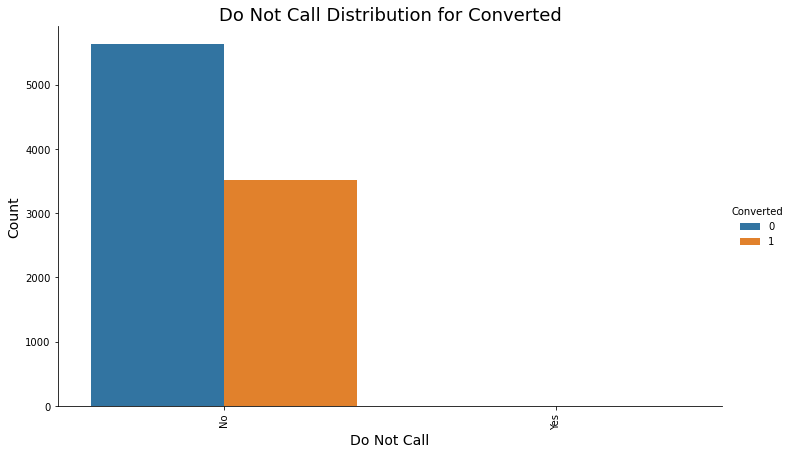

In [45]:
my_bar_plots(data=Lead1, column='Do Not Call', hue='Converted', tt='Do Not Call Distribution for Converted')

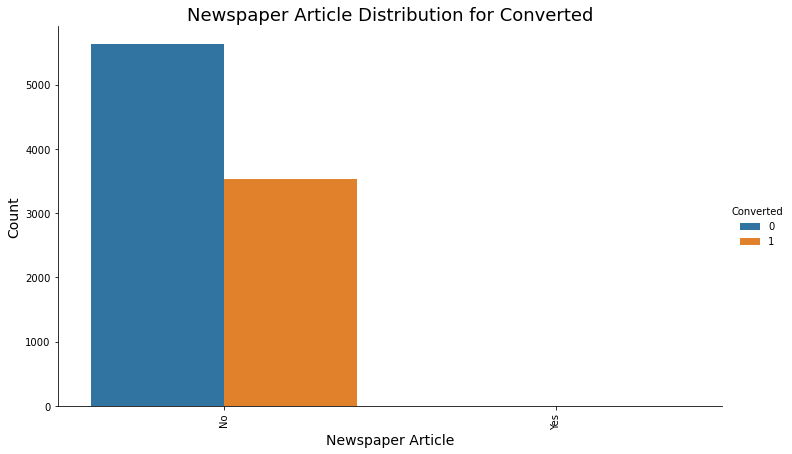

In [46]:
my_bar_plots(data=Lead1, column='Newspaper Article', hue='Converted', tt='Newspaper Article Distribution for Converted')

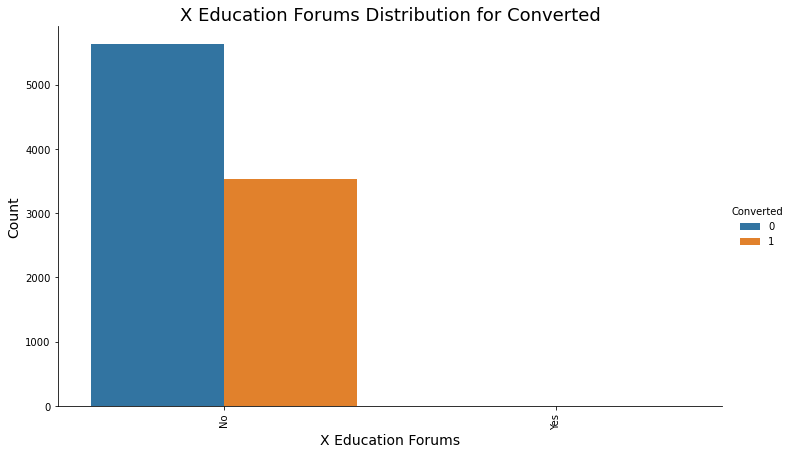

In [47]:
my_bar_plots(data=Lead1, column='X Education Forums', hue='Converted', tt='X Education Forums Distribution for Converted')

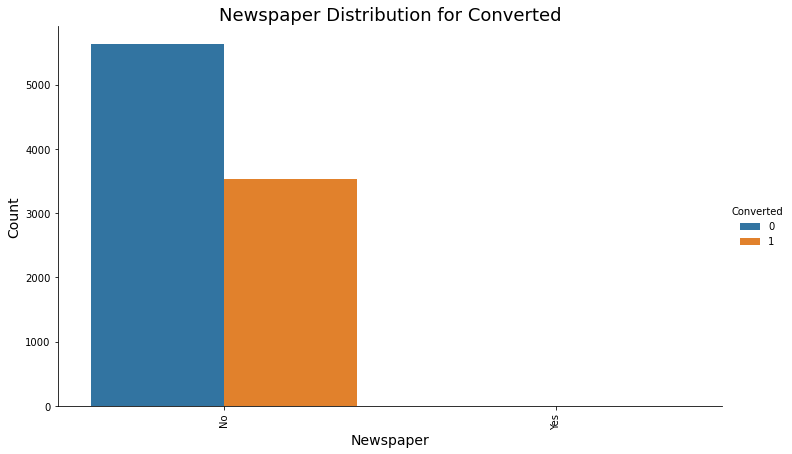

In [48]:
my_bar_plots(data=Lead1, column='Newspaper', hue='Converted', tt='Newspaper Distribution for Converted')

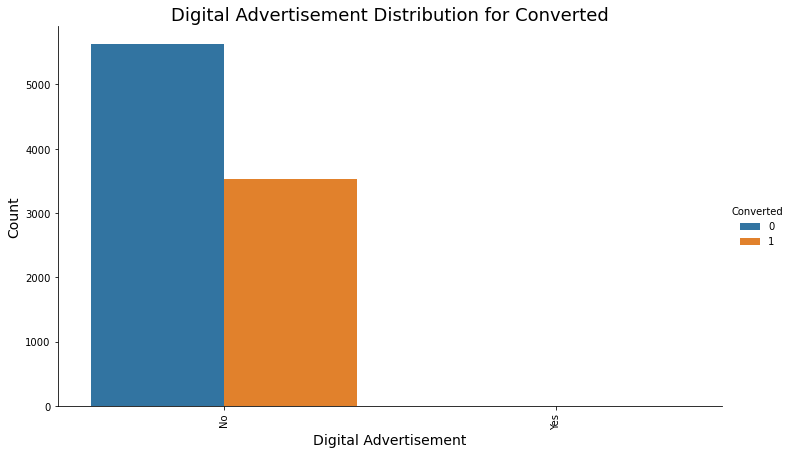

In [49]:
my_bar_plots(data=Lead1, column='Digital Advertisement', hue='Converted', tt='Digital Advertisement Distribution for Converted')

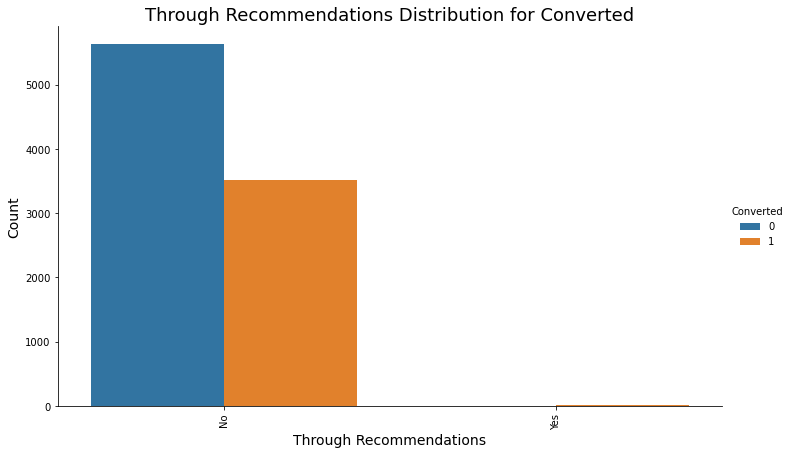

In [50]:
my_bar_plots(data=Lead1, column='Through Recommendations', hue='Converted', tt='Through Recommendations Distribution for Converted')

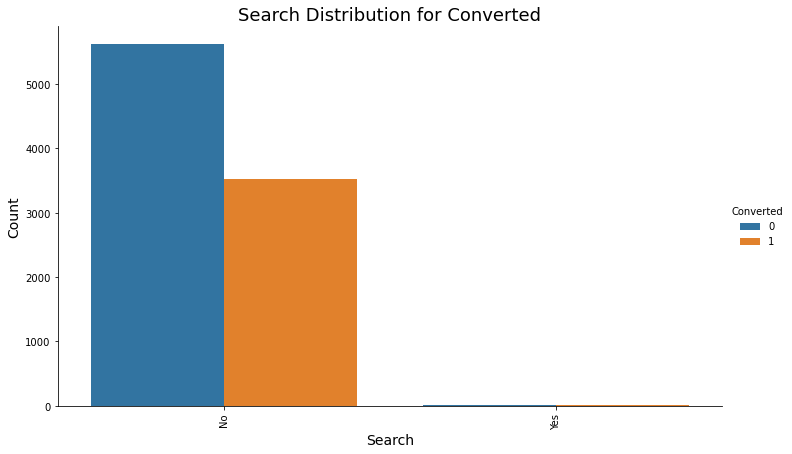

In [51]:
my_bar_plots(data=Lead1, column='Search', hue='Converted', tt='Search Distribution for Converted')

#### From above plots, we can see that below columns have only 1 category which is contributing maximum values of columns. We can drop these columns as it will not help in analysis. 

- 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Search'
- We will drop all these columns.

In [52]:
# deleting all above columns
Lead1 = Lead1.drop('Do Not Call', axis=1)
Lead1 = Lead1.drop('Newspaper Article', axis=1)
Lead1 = Lead1.drop('X Education Forums', axis=1)
Lead1 = Lead1.drop('Newspaper', axis=1)
Lead1 = Lead1.drop('Digital Advertisement', axis=1)
Lead1 = Lead1.drop('Through Recommendations', axis=1)
Lead1 = Lead1.drop('Search', axis=1)

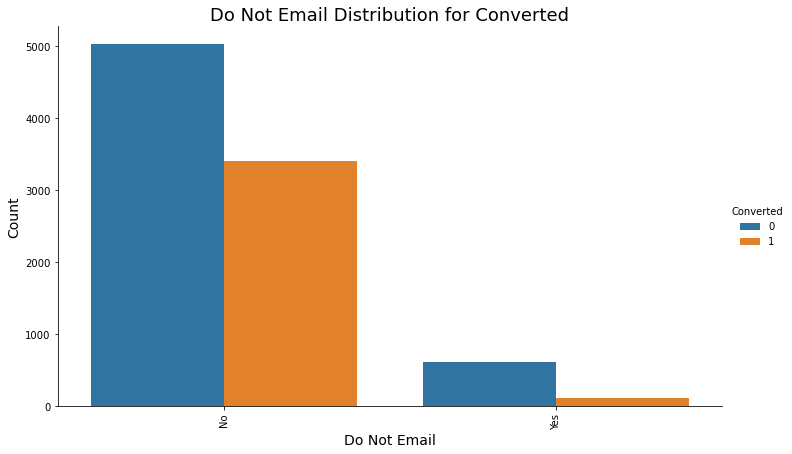

In [53]:
# Let's see other columns also through EDA to understand better
my_bar_plots(data=Lead1, column='Do Not Email', hue='Converted', tt='Do Not Email Distribution for Converted')

#### We can see that There are enough numbers available for both categories.

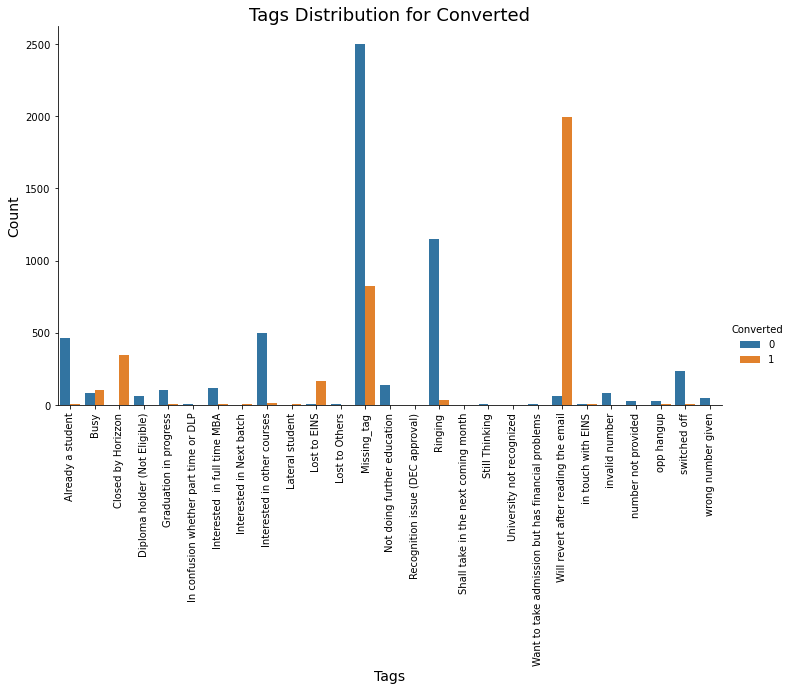

In [54]:
my_bar_plots(data=Lead1, column='Tags', hue='Converted', tt='Tags Distribution for Converted')

#### We can see that There are enough numbers available for all categories.
#### Will Revert After Reading Email & Closed by Horzon have more conversion numbers. And Ringing, Interested in other course have very few conversions.

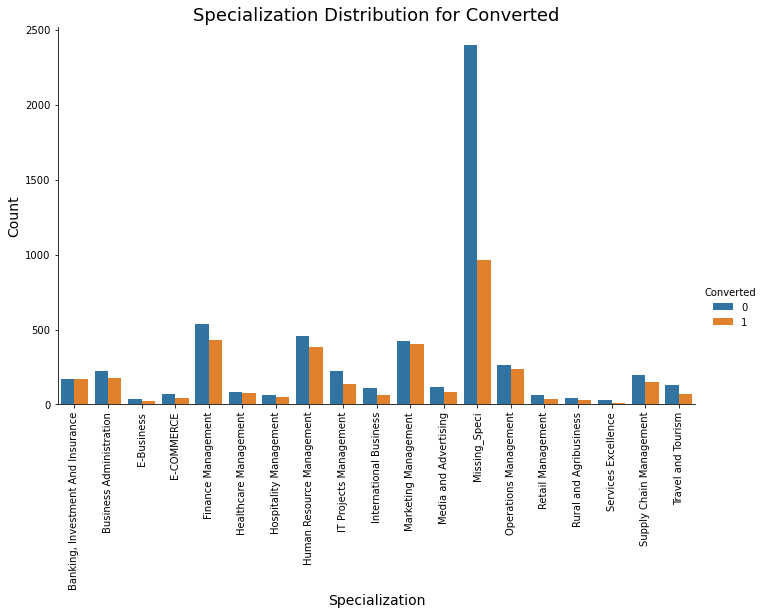

In [55]:
my_bar_plots(data=Lead1, column='Specialization', hue='Converted', tt='Specialization Distribution for Converted')

#### We can see that There are enough numbers available for all categories.
#### We can see that all categories have more or less significant conversions present.

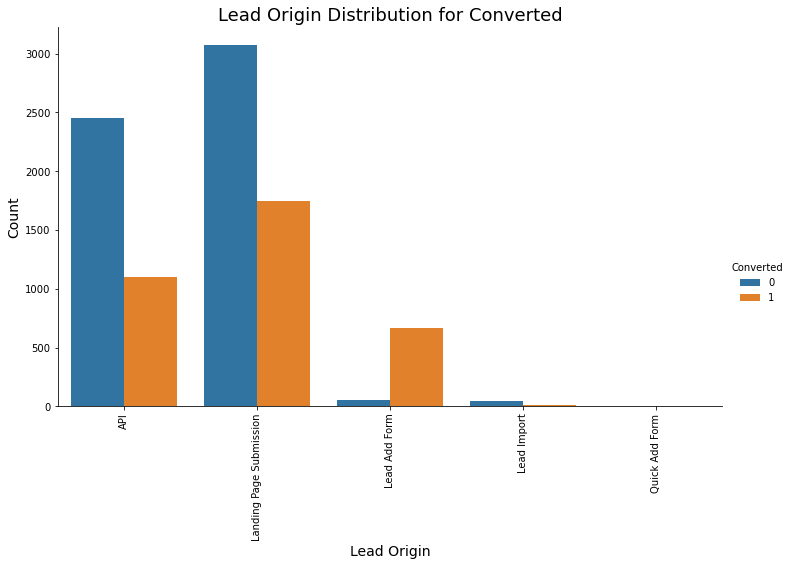

In [56]:
my_bar_plots(data=Lead1, column='Lead Origin', hue='Converted', tt='Lead Origin Distribution for Converted')

#### Lead Origin from API and Landing page submission has high number of not conversion than conversion. But over all they both have higher conversion leads from other Lead Origin categories.

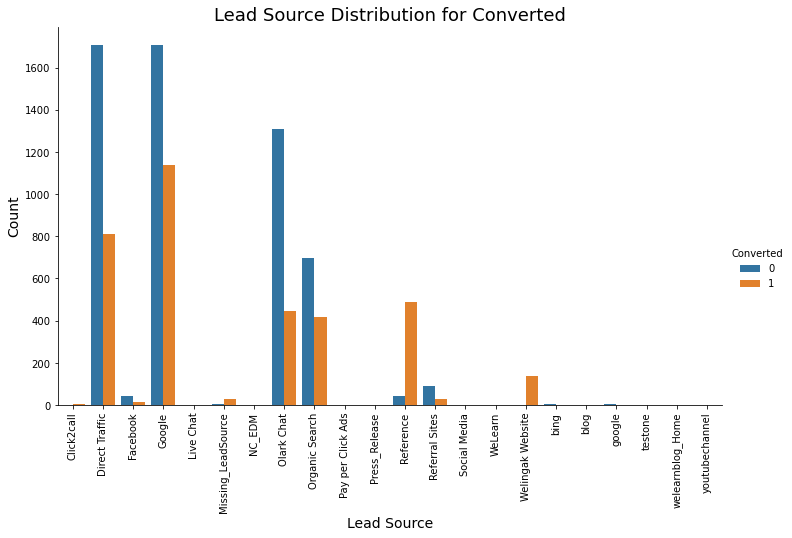

In [57]:
my_bar_plots(data=Lead1, column='Lead Source', hue='Converted', tt='Lead Source Distribution for Converted')

#### There are good number of conversion for Google, Reference, Direct Traffic, Olark Chat & Organic Search.

#### We can see that There are enough numbers available for all categories.

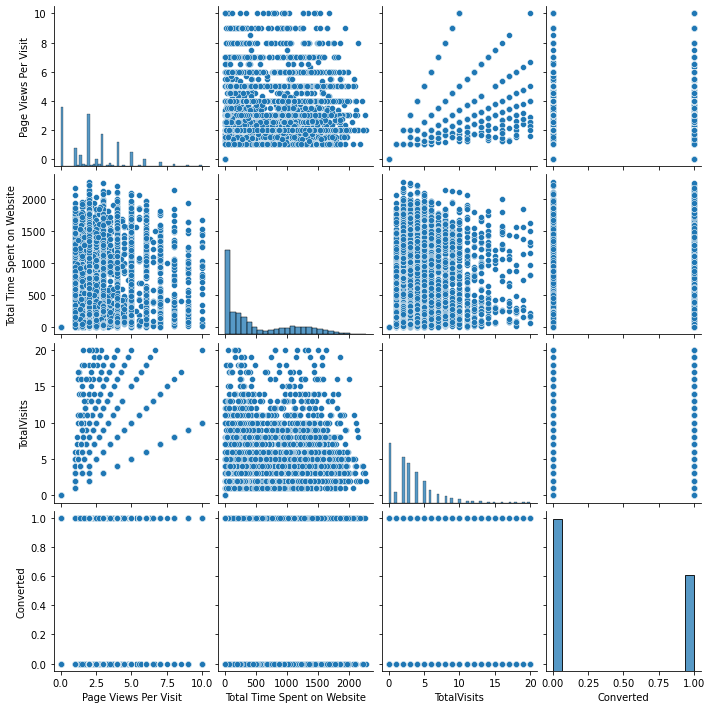

In [58]:
# Let's check numerical columns plot to see if they are related to each other or not.
sns.pairplot(data=Lead1, vars=['Page Views Per Visit', 'Total Time Spent on Website', 'TotalVisits', 'Converted'])
plt.show()

#### From above pair plots, we dont see any correlations with each other. 

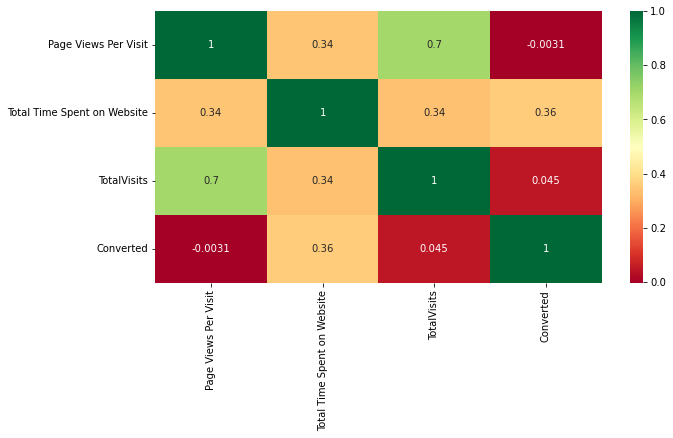

In [59]:
# Let's check with Heat map of correlations.
plt.figure(figsize=(10,5))
sns.heatmap(Lead1[['Page Views Per Visit', 'Total Time Spent on Website', 'TotalVisits', 'Converted']].corr(), 
            annot=True, cmap = 'RdYlGn')
plt.show()

#### From heat map we dont see much of correlation between these numerical variable

In [60]:
# 'Prospect ID' and 'Lead Number' columns are just IDs so we can drop them from database.
# As of not we are dropping 'Prospect ID' only. 'Lead Number' we are keeping them for time being.
# We will use 'Lead Number' later for identify all lead and their Lead Score.
Lead2 = Lead1.drop('Prospect ID', axis=1)

In [61]:
# Checking final Dataframe after cleaning dataset
Lead2.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Missing_Speci,Unemployed,Interested in other courses,Missing_LeadPro,Missing_city,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Missing_Speci,Unemployed,Ringing,Missing_LeadPro,Missing_city,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Missing_LeadPro,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Missing_Speci,Unemployed,Will revert after reading the email,Missing_LeadPro,Mumbai,No,Modified


## Let's start Model Building now.

In [62]:
# let's create dummy variables for categorical variables
Lead2 = pd.get_dummies(data=Lead2, columns= ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                                            'Specialization', 'What is your current occupation',
                                            'Tags', 'Lead Profile', 'City', 
                                             'A free copy of Mastering The Interview', 'Last Notable Activity'], 
                              drop_first=True)
Lead2.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Now lets split the dataset in Training and test dataset. We will use 70% data as training and 30% as Test dataset

In [63]:
# Splitting the data in training and test datasets
df_train1, df_test1 = train_test_split(Lead2, train_size = 0.7, random_state = 100)
print(df_train1.shape)             # checking shape of training dataset
print(df_test1.shape)              # checking shape of test dataset

(6404, 125)
(2745, 125)


In [64]:
# Now just removing 'Lead Number' column from both df_train1 & df_test1 and creating final datasets for training and test
df_train_Lead_number = df_train1.pop('Lead Number')
df_train = df_train1
print('Lead Number of Train Data: ', df_train_Lead_number.shape) # checking shape of data
print('df_train: ', df_train.shape)                              # checking shape of data
df_test_Lead_number = df_test1.pop('Lead Number')
df_test = df_test1
print('Lead Number of Train Data: ', df_test_Lead_number.shape)  # checking shape of data
print('df_test: ', df_test.shape)                                # checking shape of data

Lead Number of Train Data:  (6404,)
df_train:  (6404, 124)
Lead Number of Train Data:  (2745,)
df_test:  (2745, 124)


#### Now let's start working on Training Dataset
we will start with scalling of numerical columns

In [65]:
# Now it is time of scalling. We will use Min-Max Scalling for this case.
scaler = MinMaxScaler()

In [66]:
#create list of numeric variable and we will scale those variables with MinMax Scaler
num_var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
df_train[num_var] = scaler.fit_transform(df_train[num_var])        # using fit & tranform for scalling for numerical variable
df_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6082,0,0.85,0.489569,0.425,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3003,0,0.15,0.600976,0.300,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
9118,0,0.10,0.054150,0.200,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5354,1,0.25,0.142033,0.500,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2306,0,0.30,0.013316,0.600,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [67]:
# Creating y_train and X_train dataset for model building from whole training dataset
y_train = df_train.pop('Converted')
X_train = df_train

In [68]:
# checking shape of both dataset
print(y_train.shape)
print(X_train.shape)

(6404,)
(6404, 123)


In [69]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [70]:
# Running RFE with 15 variables as output
rfe = RFE(estimator=logreg,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [71]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 47),
 ('Lead Origin_Lead Add Form', False, 7),
 ('Lead Origin_Lead Import', False, 91),
 ('Lead Origin_Quick Add Form', False, 79),
 ('Lead Source_Direct Traffic', False, 22),
 ('Lead Source_Facebook', False, 19),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Live Chat', False, 103),
 ('Lead Source_Missing_LeadSource', False, 46),
 ('Lead Source_NC_EDM', False, 29),
 ('Lead Source_Olark Chat', False, 62),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Pay per Click Ads', False, 106),
 ('Lead Source_Press_Release', False, 105),
 ('Lead Source_Reference', False, 28),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Social Media', False, 88),
 ('Lead Source_WeLearn', False, 102),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 97),
 ('Lead Source_blog', False, 72),
 ('Lead Source_goog

In [72]:
# Put all the columns selected by RFE in the variable 'columns'
columns = X_train.columns[rfe.support_]
columns

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Missing_CurOccu', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Missing_tag', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Modified'],
      dtype='object')

In [73]:
# Selecting columns selected by RFE
X_train = X_train[columns]

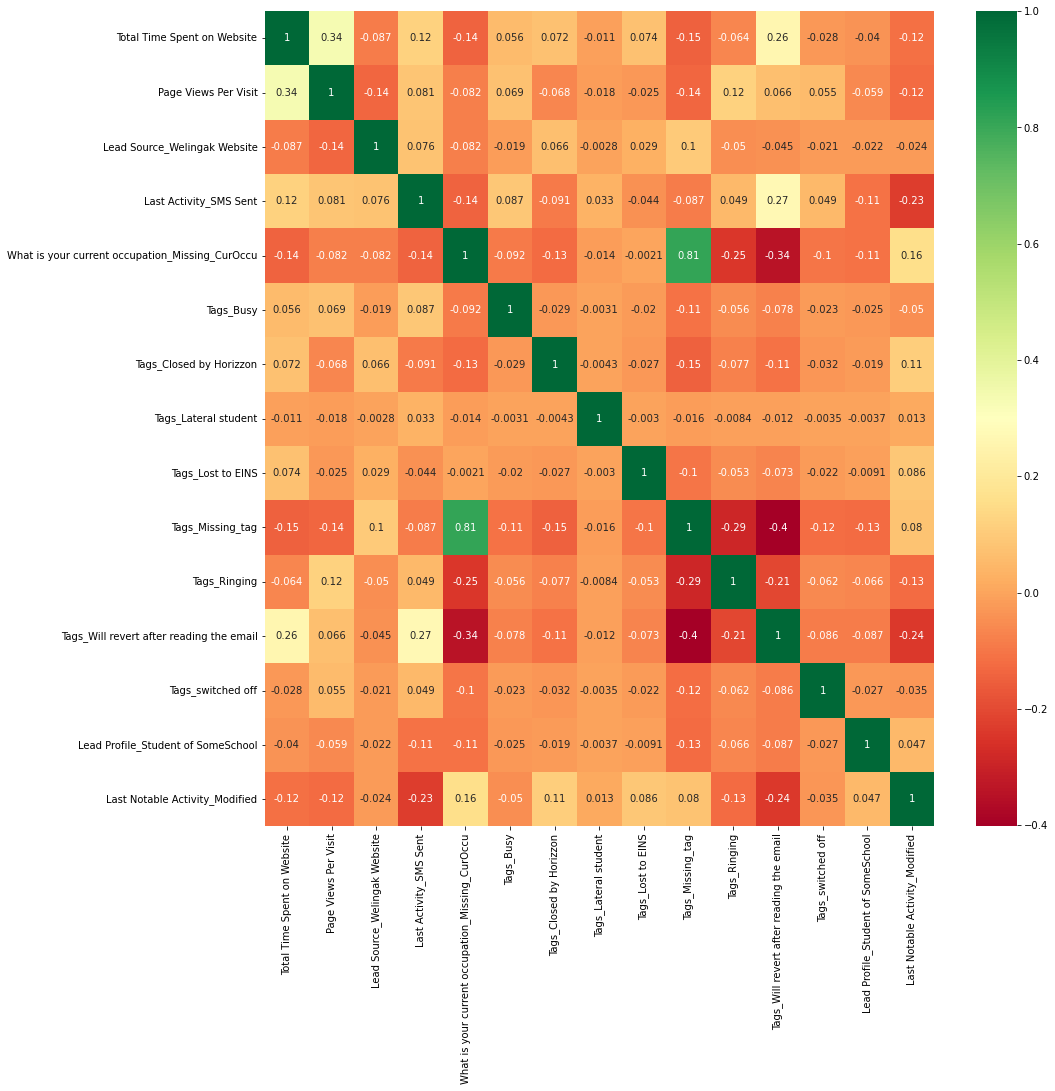

In [74]:
# Lets check Correlation between selected feature by RFE.
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True, cmap = 'RdYlGn')
plt.show()

#### We see that most of the features selected by RFE has not much Multicollinearity. We see that there is significant correlation between 'What is your current occupation_Missing_CurOccu' & 'Tags_Missing_tag'. We will take care of this while checking VIFs.

#### Now we will start building model, so creating 2 function for building model and calculating VIFs

In [75]:
# Function for building model based on selected columns
def my_model(columns):
    X_train_sm = sm.add_constant(X_train[columns])
    logreg1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
    print(logreg1.summary())
    return logreg1, X_train_sm          # we will take output also for built model and selected X_train_sm

# Function for calculating VIFs among selected columns
def my_VIF(columns):
    new_vif = X_train[columns]
    vif = pd.DataFrame()
    vif['Features'] = new_vif.columns
    vif['VIF'] = [variance_inflation_factor(new_vif.values, i) for i in range(new_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by='VIF', ascending = False))

## Model 1

In [76]:
# First model we will create with Columns selected by RFE.
columns = ['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Missing_CurOccu', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Missing_tag', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Modified']
logreg1, X_train_sm = my_model(columns)
my_VIF(columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6404
Model:                            GLM   Df Residuals:                     6388
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1119.5
Date:                Tue, 13 Sep 2022   Deviance:                       2239.0
Time:                        16:23:09   Pearson chi2:                 1.03e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.6248
Covariance Type:            nonrobust                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

#### We can see that in model 'Tags_Lateral student' has very high p-value. We have to delete this feature from model

## Model 2

In [77]:
# removing 'Tags_Lateral student' from model and creating new model
columns = ['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Missing_CurOccu', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Missing_tag', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Modified']
logreg1, X_train_sm = my_model(columns)
my_VIF(columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6404
Model:                            GLM   Df Residuals:                     6389
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1127.3
Date:                Tue, 13 Sep 2022   Deviance:                       2254.5
Time:                        16:23:09   Pearson chi2:                 1.02e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6239
Covariance Type:            nonrobust                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

#### We see that p-values for all selected feature is under 0.05. But VIF for 'Tags_Missing_tag' is above 5. I will delete this feature from model and will see impact on model performance.

## Model 3

In [78]:
# removing 'Tags_Missing_tag' from model and creating new model
columns = ['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Missing_CurOccu', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Modified']
logreg1, X_train_sm = my_model(columns)
my_VIF(columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6404
Model:                            GLM   Df Residuals:                     6390
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1312.1
Date:                Tue, 13 Sep 2022   Deviance:                       2624.2
Time:                        16:23:09   Pearson chi2:                 9.94e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6016
Covariance Type:            nonrobust                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

#### We see that p-values for 'Tags_Busy' feature is above 0.05. We will remove this feature from model. 

## Model 4

In [79]:
# removing 'Tags_Busy' from model and creating new model
columns = ['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Missing_CurOccu',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Modified']
logreg1, X_train_sm = my_model(columns)
my_VIF(columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6404
Model:                            GLM   Df Residuals:                     6391
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1313.6
Date:                Tue, 13 Sep 2022   Deviance:                       2627.3
Time:                        16:23:09   Pearson chi2:                 1.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6014
Covariance Type:            nonrobust                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

#### With this model all p-values are below 0.05 and VIFs are also below 5.
#### But There is one feature 'What is your current occupation_Missing_CurOccu' which is missing values for current occupation which we created new category in that column for Null values.
#### I feel we should drop this column. And it will not impact overall model performance.

## Model 5

In [80]:
# removing 'What is your current occupation_Missing_CurOccu' from model and creating new model
columns = ['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Modified']
logreg1, X_train_sm = my_model(columns)
my_VIF(columns)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6404
Model:                            GLM   Df Residuals:                     6392
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1351.3
Date:                Tue, 13 Sep 2022   Deviance:                       2702.6
Time:                        16:23:09   Pearson chi2:                 9.78e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5967
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

#### We can see that p-value for all features now is less than 0.05. And VIFs for all selected feature also below 5.
#### Model Stats like Likelyhood also not affected much. We can make this model as final.

## Model Evaluation on Training Dataset

In [81]:
# Just printing final features selected in final model for reference. 
columns

['Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead Source_Welingak Website',
 'Last Activity_SMS Sent',
 'Tags_Closed by Horizzon',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_switched off',
 'Lead Profile_Student of SomeSchool',
 'Last Notable Activity_Modified']

In [82]:
# Now let's predict the final values using the final created model.
y_train_pred = logreg1.predict(X_train_sm)
y_train_pred[:10]                       # just printing 10 predicted probabilities for each lead.

6082    0.142400
3003    0.487621
9118    0.021956
5354    0.985870
2306    0.006245
2951    0.072564
2745    0.099607
574     0.054862
951     0.041903
3809    0.111375
dtype: float64

In [83]:
# Reshaping to predicted array 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14240047, 0.48762147, 0.02195556, 0.98586983, 0.00624517,
       0.07256354, 0.09960741, 0.05486216, 0.04190319, 0.11137454])

In [84]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.142400
1,0,0.487621
2,0,0.021956
3,1,0.985870
4,0,0.006245


#### Now we need to find the cut off. Let's start with 0.5 as cut off and see how Model performs for it checks

In [85]:
y_train_pred_final['Predicted_0.5'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted_0.5
0,0,0.142400,0
1,0,0.487621,0
2,0,0.021956,0
3,1,0.985870,1
4,0,0.006245,0


In [86]:
# Creating confusion matrix 
confusion1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted_0.5'] )
confusion1

array([[3789,  169],
       [ 313, 2133]], dtype=int64)

In [87]:
# True Positive
TP = confusion1[1,1]
# True Negatives
TN = confusion1[0,0]
# False Positives
FP = confusion1[0,1] 
# False Negatives
FN = confusion1[1,0]

### Let's Check the Accuracy, Sensitivity and Specificity Metric now

In [88]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted_0.5'])

0.9247345409119301

In [89]:
# Calculating the sensitivity
TP/(TP+FN)

0.8720359771054783

In [90]:
# Calculating the specificity
TN/(TN+FP)

0.9573016675088428

#### We can see that overall accuracy 92.47%, Sensitivity 87.20% and Specificity 95.73%. This are very good values.

#### However we need to optimize the cut-off here to see how we can improve this model.

#### Let's find out optimal cutoff.

In [91]:
# We will check all cutoff from 0.1 to 0.9 and will see how prediction.
# Create columns for all probability cut off. 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.142400,0,1,1,0,0,0,0,0,0,0,0
1,0,0.487621,0,1,1,1,1,1,0,0,0,0,0
2,0,0.021956,0,1,0,0,0,0,0,0,0,0,0
3,1,0.985870,1,1,1,1,1,1,1,1,1,1,1
4,0,0.006245,0,1,0,0,0,0,0,0,0,0,0


In [92]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','Specificity'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,Specificity]
cutoff_df

,probability,accuracy,sensitivity,Specificity
0.0,0.0,0.381949,1.000000,0.000000
0.1,0.1,0.801062,0.968929,0.697322
0.2,0.2,0.905684,0.926819,0.892623
0.3,0.3,0.913335,0.912101,0.914098
0.4,0.4,0.918020,0.891660,0.934310
0.5,0.5,0.924735,0.872036,0.957302
0.6,0.6,0.917083,0.825020,0.973977
0.7,0.7,0.912399,0.803352,0.979788
0.8,0.8,0.901780,0.766558,0.985346
0.9,0.9,0.884916,0.713410,0.990904


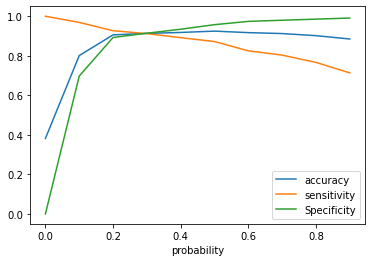

In [93]:
# Plotting it to see how it looks, so we can select optimal cut off.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','Specificity'])
plt.show()

#### We see that from above plot that, optimal cut off looks like 0.3 where we have optimum value of all Accuracy, Sensitivity & Specificity. So According to Accuracy, Sensitivity & Specificity trade-off 0.3 is optimum cut-off.

In [94]:
# Let's predict the final output with 0.3 cut off. 
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.142400,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.487621,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.021956,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.985870,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.006245,0,1,0,0,0,0,0,0,0,0,0,0


In [95]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3618,  340],
       [ 215, 2231]], dtype=int64)

In [96]:
# True Positive
TP = confusion2[1,1]
# True Negatives
TN = confusion2[0,0]
# False Positives
FP = confusion2[0,1] 
# False Negatives
FN = confusion2[1,0]

In [97]:
# Check the overall accuracy
print('Training Dataset Accuracy: ', metrics.accuracy_score(y_train_pred_final.Converted, 
                                                            y_train_pred_final.final_predicted))

Training Dataset Accuracy:  0.9133354153653966


In [98]:
# Calculating the sensitivity
print('Training Dataset Sensitivity: ', TP/(TP+FN))

Training Dataset Sensitivity:  0.9121013900245298


In [99]:
# Calculating the specificity
print('Training Dataset Specificity: ', TN/(TN+FP))

Training Dataset Specificity:  0.9140980293077312


#### We can see that overall accuracy 91.33%, Sensitivity 91.21% and Specificity 91.40%. This are very good values on Training Data
#### Let's final this model with this final cut off.

In [100]:
# Let's first plot the ROC Curve
# ROC function
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

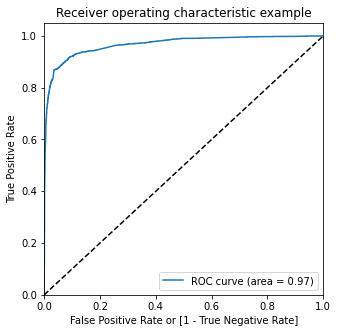

In [101]:
# Let's check ROC Curve with this predicted value.
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Conversion_Prob'])

#### ROC Curve should be close to 1. And we are getting a good value of 0.97 indicating good predicting value.

In [102]:
# Now let's print Lead Score for Training Dataset.
# we will use dataframe for 'Lead Number' for training dataset which we made earlier.
df_train_Lead_number = df_train_Lead_number.reset_index(drop=True)
df_train_Lead_number.head()

0    603166
1    631017
2    580453
3    608784
4    637410
Name: Lead Number, dtype: int64

In [103]:
# merging the 'Lead Number' dataframe of training with final predicted value.
# by this we will get Lead Score against each Lead Number.
Train_Lead_Score = pd. merge(df_train_Lead_number, y_train_pred_final[['Converted', 'Conversion_Prob', 
                                                                       'final_predicted']], 
                             left_index=True, right_index=True)
Train_Lead_Score['Lead Score'] = Train_Lead_Score['Conversion_Prob'].apply(lambda x: round(x*100))
Train_Lead_Score.head()

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead Score
0,603166,0,0.142400,0,14
1,631017,0,0.487621,1,49
2,580453,0,0.021956,0,2
3,608784,1,0.985870,1,99
4,637410,0,0.006245,0,1


#### We can see the Lead Score of each lead number with Final_Predicted values.

### Let's Check Precision-Recall Trade-off

In [104]:
# Calculating Precision based on 0.3 cut-off values calculated earlier
precision = TP/(TP + FP)
precision

0.867755737067289

In [105]:
# Calculating Recall based on 0.3 cut-off values calculated earlier
recall = TP/(TP + FN)
recall

0.9121013900245298

#### Let's find optimum cut-off based on Precision-Recall trade-off.

In [106]:
# calculating Precsion and recall curve based on training dataset 'Converted' and 'Conversion_Prob'
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

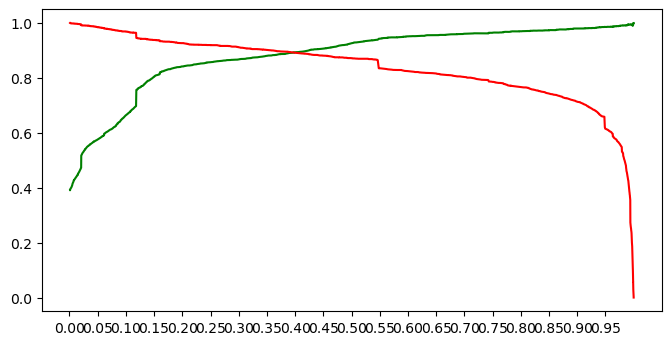

In [107]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

#### By Above plot of Precision-recall, optimum cut-off should be 0.4.

In [108]:
# Let's predict the final output with 0.3 cut off. 
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.142400,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.487621,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.021956,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.985870,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.006245,0,1,0,0,0,0,0,0,0,0,0,0


In [109]:
# Creating confusion matrix 
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[3698,  260],
       [ 265, 2181]], dtype=int64)

In [110]:
# True Positive
TP = confusion3[1,1]
# True Negatives
TN = confusion3[0,0]
# False Positives
FP = confusion3[0,1] 
# False Negatives
FN = confusion3[1,0]

In [111]:
# Calculating Precision
Precision = TP / (TP + FP)
Precision

0.8934862761163458

In [112]:
# Calculating Recall
Recall = TP / (TP + FN)
Recall

0.8916598528209322

#### Lets calulate F1-Score also
F1 = 2×(Precision*Recall)/(Precision+Recall)

In [113]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.892572130141191

### So based on Precision-Recall Tradeoff below are statistics
 - Precision = 89.34%
 - Recall = 89.16%
 - F1-Score = 89.25%

These values are good and can be considered.
 
#### However, we will use our earlier cutoff 0.3 which we selected based on Accuracy, Sensitivity and Specificity because it looks more better.

## Model Evaluation on Test Dataset

In [114]:
#create list of numeric variable and we will scale those variables with MinMax Scaler
num_var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
df_test[num_var] = scaler.transform(df_test[num_var])        # using tranform for scalling for numerical variable
df_test.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2797,1,0.0,0.000000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4431,0,0.1,0.154461,0.2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6844,1,0.2,0.150022,0.4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1369,1,0.1,0.491789,0.2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3918,1,0.2,0.504217,0.4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
df_test.shape

(2745, 124)

In [116]:
# Creating y_train and X_train dataset for model building from whole training dataset
y_test = df_test.pop('Converted')
X_test = df_test

In [117]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2797,0.0,0.000000,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4431,0.1,0.154461,0.2,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6844,0.2,0.150022,0.4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1369,0.1,0.491789,0.2,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3918,0.2,0.504217,0.4,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [118]:
X_test = X_test[columns]

In [119]:
X_test.shape

(2745, 11)

In [120]:
X_test.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified
2797,0.000000,0.0,0,1,0,0,0,1,0,0,0
4431,0.154461,0.2,0,0,0,0,1,0,0,0,0
6844,0.150022,0.4,0,1,0,0,0,0,0,0,0
1369,0.491789,0.2,0,0,0,0,0,0,0,0,1
3918,0.504217,0.4,0,0,0,0,0,0,0,0,0


In [121]:
# adding constant for logistic regression model run
X_test_sm = sm.add_constant(X_test[columns])
y_test_pred = logreg1.predict(X_test_sm)

In [122]:
# Creating New dataframe for each probability and actual converted table
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.993956
1,0,0.008416
2,1,0.476029
3,1,0.079909
4,1,0.274457


#### Let's Calcuate Precision-Recall based on 0.4 cutoff selected based on that Precision-Recall tradeoff.

In [123]:
# Making prediction using cut off 0.4
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.993956,1
1,0,0.008416,0
2,1,0.476029,1
3,1,0.079909,0
4,1,0.274457,0


In [124]:
# Creating confusion matrix 
confusion_test1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test1

array([[1566,  101],
       [ 114,  964]], dtype=int64)

In [125]:
# True Positive
TP = confusion_test1[1,1]
# True Negatives
TN = confusion_test1[0,0]
# False Positives
FP = confusion_test1[0,1] 
# False Negatives
FN = confusion_test1[1,0]

In [126]:
# Calculating Precision
Precision = TP / (TP + FP)
Precision

0.9051643192488263

In [127]:
# Calculating Recall
Recall = TP / (TP + FN)
Recall

0.8942486085343229

#### Lets calulate F1-Score also
F1 = 2×(Precision*Recall)/(Precision+Recall)

In [128]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.8996733551096594

#### So based on Precision-Recall Tradeoff below are statistics
 - Precision = 90.51%
 - Recall = 89.42%
 - F1-Score = 89.96%

### Now Evaluation with cut-off 0.3 selected from Accuracy, Sensitivity & Specificity activity. So takinng cut-off 0.3 now.

In [129]:
# Making prediction using cut off 0.3
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.993956,1
1,0,0.008416,0
2,1,0.476029,1
3,1,0.079909,0
4,1,0.274457,0


In [130]:
# Creating confusion matrix 
confusion_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
confusion_test

array([[1526,  141],
       [  96,  982]], dtype=int64)

In [131]:
# True Positive
TP = confusion_test[1,1]
# True Negatives
TN = confusion_test[0,0]
# False Positives
FP = confusion_test[0,1] 
# False Negatives
FN = confusion_test[1,0]

In [132]:
# Check the overall accuracy
print('Test Data Set Accuracy: ', metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_predicted']))

Test Data Set Accuracy:  0.9136612021857924


In [133]:
# Calculating the sensitivity
print('Test Data Set Sensitivity: ', TP/(TP+FN))

Test Data Set Sensitivity:  0.9109461966604824


In [134]:
# Calculating the specificity
print('Test Data Set Specificity: ', TN/(TN+FP))

Test Data Set Specificity:  0.9154169166166767


#### We can see that overall 
 - Accuracy 91.36%, 
 - Sensitivity 91.09%
 - Specificity 91.54%

This are very good values.

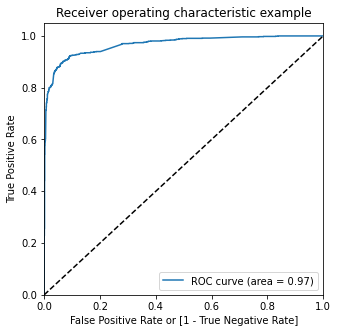

In [135]:
# Let's check ROC Curve for test dataset
draw_roc(y_pred_final['Converted'], y_pred_final['Conversion_Prob'])

#### For test data set also we are getting ROC Curve value 0.97. This value is Excellent.

#### Now we will calculate Lead Score on test data for each Lead Number

In [136]:
# Now let's print Lead Score for Test Dataset.
# we will use dataframe for 'Lead Number' for Test dataset which we made earlier.
df_test_Lead_number = df_test_Lead_number.reset_index(drop=True)
df_test_Lead_number.head()

0    632862
1    617213
2    597233
3    645530
4    622495
Name: Lead Number, dtype: int64

In [137]:
# merging the 'Lead Number' dataframe of test with final predicted value.
# by this we will get Lead Score against each Lead Number.
Test_Lead_Score = pd. merge(df_test_Lead_number, y_pred_final,left_index=True, right_index=True)
Test_Lead_Score['Lead Score'] = Test_Lead_Score['Conversion_Prob'].apply(lambda x: round(x*100))
Test_Lead_Score.head()

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead Score
0,632862,1,0.993956,1,99
1,617213,0,0.008416,0,1
2,597233,1,0.476029,1,48
3,645530,1,0.079909,0,8
4,622495,1,0.274457,0,27


#### Here is the Lead score of each leads of test dataset.
#### Lets merge these 2 final dataframe with lead score to get Lead Score of entire dataset. 

In [138]:
# Merging both datasets to get entire dataset with 'Lead Number'
Lead_Score_All_Leads = pd.concat([Test_Lead_Score, Train_Lead_Score], ignore_index=True)
Lead_Score_All_Leads.head()

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead Score
0,632862,1,0.993956,1,99
1,617213,0,0.008416,0,1
2,597233,1,0.476029,1,48
3,645530,1,0.079909,0,8
4,622495,1,0.274457,0,27


### Here is the entire dataset with 'Lead Number', Actual 'Converted', Predicted value through model and Lead Score

### Determining Feature Importance from selected ones by Final Model.

In [139]:
#Creating dataframe of selected features from Final Model and their co-efficients.
pd.options.display.float_format = '{:.2f}'.format
new_params = logreg1.params[1:]
new_params

Total Time Spent on Website                 3.73
Page Views Per Visit                       -2.10
Lead Source_Welingak Website                5.97
Last Activity_SMS Sent                      2.20
Tags_Closed by Horizzon                     7.69
Tags_Lost to EINS                           6.78
Tags_Ringing                               -2.91
Tags_Will revert after reading the email    4.92
Tags_switched off                          -3.76
Lead Profile_Student of SomeSchool         -3.28
Last Notable Activity_Modified             -1.85
dtype: float64

In [140]:
# arranging them in descending co-efficient value.
pd.DataFrame(new_params).reset_index().sort_values(by=0,ascending=False)

,index,0
4,Tags_Closed by Horizzon,7.69
5,Tags_Lost to EINS,6.78
2,Lead Source_Welingak Website,5.97
7,Tags_Will revert after reading the email,4.92
0,Total Time Spent on Website,3.73
3,Last Activity_SMS Sent,2.20
10,Last Notable Activity_Modified,-1.85
1,Page Views Per Visit,-2.10
6,Tags_Ringing,-2.91
9,Lead Profile_Student of SomeSchool,-3.28


#### We can see that above features are affecting probability of Lead Conversion.
From Selected feature by Model below we can say:
 - Top three feature which affects Lead Conversion is 'Tags_Closed by Horizzon', 'Tags_Lost to EINS' & 'Lead Source_Welingak Website'
 - Least affecting feature is 'Tags_switched off'

# Conclusion
After this entire exercise we have made a Final Logistic Regression Model with below statistics.
#### For Training Dataset:

 - Accuracy - 91.33%
 - Sensitivity - 91.21%
 - Specificity - 91.40%

 Precision, Recall calculated based on 0.4 cut-off.
 - Precision = 89.34%
 - Recall = 89.16%
 - F1-Score = 89.25%

#### For Test Dataset:
 - Accuracy - 91.36%
 - Sensitivity - 91.09%
 - Specificity - 91.54%
 
 Precesion, Recall calculated based on 0.4 cut-off.
 - Precision = 90.51%
 - Recall = 89.42%
 - F1-Score = 89.96%

#### ROC Curve also we are getting 0.97 for both training and test dataset, which is close to 1, which is good predictive value.

#### Below features are affecting the most in potential conversion (Descending Order) :
 - Tags_Closed by Horizzon
 - Tags_Lost to EINS
 - Lead Source_Welingak Website
 - Tags_Will revert after reading the email
 - Total Time Spent on Website
 - Last Activity_sent SMS
 - Last Notable Activity_Modified
 - Page Views Per Visit
 - Tags_Ringing
 - Lead Profile_Student of SomeSchool
 - Tags_switched off






### With this Model we can predict Conversion Rate in a better way and X Education company can utilize this and idetify potential buyers and can arrange call back and convince them to buy their course. 
### And this way  X Education company can improve their Lead Conversion Rate and achieve provided target of 80% Conversion Rate through this model.